# Changing Colorspaces

## Goal

- 이미지의 color-space를 변환하는 방법을 배운다 : BGR <-> Gray, BGR <-> HSV 등
- video에서 colored object를 추출하는 application을 만들어본다.
- 함수의 사용법을 배운다 : `cv2.cvtColor()`, `cv2.inRange()`, 등

### Changing Color-space

OpenCV에서는 150개 이상의 color-space 변환이 가능하다. 하지만 여기서는 널리 사용되는 두가지를 다룬다 : BGR <-> Gray, BGR <-> HSV

color-space 변환을 위해 `cv2.cvtColor(input_image, flag)`를 사용한다. 여기서 두번째 인자인 `flag`는 변환 타입이다.

BGR -> Gray 변환을 위해 사용하는 `flag`는 `cv2.COLOR_BGR2GRAY`이다. 비슷하게 BGR -> HSV 변환에서는 `cv2.COLOR_BGR2HSV`를 사용한다.

다음의 코드를 통해 가능한 모든 변환을 출력해보자.

In [1]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

#### Note

HSV에서, hue의 범위는 \[0, 179\]이고, saturation의 범위는 \[0, 255\], value의 범위는 \[0, 255\]이다.

다른 소프트웨어에서는 스케일이 다를 수 있으므로, 이를 OpenCV와 비교하기 위해서는 위의 범위를 normalize해야 한다.

### Object Tracking

BGR 이미지를 HSV로 변환하는 법을 알기 때문에 이제 이를 사용해 colored object를 추출할 수 있다.

HSV는 BGR보다 색상을 표현하기 더욱 쉽다. 여기서는 다음의 방법을 통해 blue colored object를 추출하는 application을 만들어본다.
- video로부터 frame을 받는다.
- BGR에서 HSV로 color-space를 변환한다.
- blue color의 영역으로 HSV 이미지를 threshold한다.
- blue object를 추출한다.

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Can't open video")
    exit()

while(True):
    # video frame 읽기
    ret, frame = cap.read()
    if ret is False:
        print("Can't read frame")
        break
    
    # BGR에서 HSV로 color-space 변환
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # blue color 영역 정의
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([150, 255, 255])
    
    # blue 영역으로 Threshold
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # 원본 frame에 bitwise AND mask를 한다.
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('hsv', hsv)
    cv2.imshow('res', res)
    # 종료 키 : ESC
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break
    # 저장 키 : s
    elif k == ord('s'):
        cv2.imwrite('./images/extracted_blue_object.jpg', res)

cap.release()
cv2.destroyAllWindows()

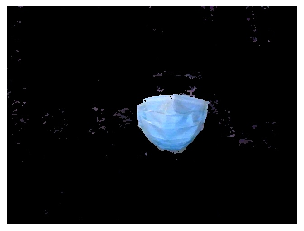

In [3]:
import matplotlib.pyplot as plt

result = cv2.imread('./images/extracted_blue_object.jpg')
result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
plt.imshow(result), plt.axis('off')
plt.show()

파란색 마스크를 낀 후 테스트 해본 결과 마스크만 추출된 것을 볼 수 있다.

#### Note
결과 이미지에는 약간의 노이즈가 있다. 이를 제거하는 방법은 이후 챕터에서 배우게 된다.

위 방법은 아주 간단한 object tracking 방법이다. contour 함수를 배우고 나면 object의 centroid를 찾고 이를 이용해 object를 tracking하기, 카메라 앞에서 손을 통해 diagram 그리기 등의 여러가지 재미있는 것을 만들 수 있다.

### How to find HSV values to track?

어떻게 tracking 할 HSV 값을 찾을 것인가는 stackoverflow.com에서 일반적으로 등장하는 질문이다. 

HSV 값을 찾는 방법은 같은 함수인 `cv2.cvtColor()`를 사용하는 것이다. 인자로 이미지 대신, 원하는 BGR 값을 전달하면 된다.

예를 들어, Green color의 HSV 값이 필요하다면 다음의 코드를 통해 얻을 수 있다.

In [4]:
import numpy as np

# 인자 차원 맞춰주기위해서 [[[(b, g, r)]]] 형태로 선언함
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


이제 \[H-10, 100, 100\]과 \[H+10, 255, 255\]처럼 lower, upper 경계를 각각 정해주면 된다.

위와 다른 방법으로는 GIMP와 같은 image editing tool을 이용해 HSV value를 구하는 방법이 있다. 이때 기억해야 할 것은 scale의 차이가 있다면 HSV range를 normalize해서 조정해주는 것이 필요하다는 것이다.